# Práctica 1

## Preparación de entorno

In [384]:
import numpy as np
from matplotlib import pyplot as plt

## SETUP 

### Variables a definir

In [385]:
valor1_and = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
valor2_and =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie

neurona_and = [valor1_and,valor2_and] # Generamos una matriz de pesos aleatoria en intervalo -1,1

valor1_xor = round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie
valor2_xor =  round(np.random.uniform(-1,1),3) # Truncamos para evitar que coja muchos decimales y se lie

neurona_xor = [valor1_xor,valor2_xor] # Generamos una matriz de pesos aleatoria en intervalo -1,1

umbral = 0.4# TOCAR
learning_rate = 0.3 # TOCAR
n_iteraciones = 20 # TOCAR

entradas = [[0,0],[0,1],[1,0],[1,1]] # Para el entramiento, elegiremos aleatoriamente una de estas entradas constantemente (2 entradas)

### Funciones de entrenamiento

#### Función de activación

In [386]:
def funcionActivacion(neurona,entradas,umbral):
    if((np.dot(neurona,entradas) - umbral) < 0):
        return 0
    else:
        return 1

#### Función de aprendizaje

In [387]:
def aprendizaje(neurona,learning_rate,expected,obtenido,entradas):
    neuronaN = np.array(neurona) + np.array((learning_rate*(expected-obtenido))*np.transpose(entradas)) # Convertimos por seguridad ambos a np.array (suma de vectores)
    return neuronaN

## Entrenamiento

In [388]:
def entrenamiento_and(entradas,neurona,umbral,learning_rate):
    for i in range(n_iteraciones):
        for entrada in entradas:
            expected = entrada[0] * entrada[1]
            salida_obtenida = funcionActivacion(neurona, entrada,umbral)
            neurona = aprendizaje(neurona,learning_rate,expected,salida_obtenida,entrada)
    return neurona

def entrenamiento_xor(entradas,neurona,umbral,learning_rate):
    for i in range(n_iteraciones):
        for entrada in entradas:
            expected = entrada[0] ^ entrada[1]
            salida_obtenida = funcionActivacion(neurona, entrada,umbral)
            neurona = aprendizaje(neurona,learning_rate,expected,salida_obtenida,entrada)
    return neurona

In [389]:
# LLAMADA PARA EJECUCIÓN
neurona_clasificar_and = entrenamiento_and(entradas,neurona_and,umbral,learning_rate)
neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,umbral,learning_rate)

## Clasificador 

In [390]:
# AND
print("================ VALORES AND ================")
for entrada in entradas:
    print("ENTRADA ->", entrada, " EXPECTED ->", (entrada[0] * entrada[1]) ," OBTENIDO ->", funcionActivacion(neurona_clasificar_and,entrada,umbral))
# AND
print("\n ================ VALORES XOR ================")
for entrada in entradas:
    print("ENTRADA ->", entrada, " EXPECTED ->", (entrada[0] ^ entrada[1]) ," OBTENIDO ->", funcionActivacion(neurona_clasificar_xor,entrada,umbral))

================ VALORES AND ================
ENTRADA -> [0, 0]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [0, 1]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [1, 0]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [1, 1]  EXPECTED -> 1  OBTENIDO -> 1

 ================ VALORES XOR ================
ENTRADA -> [0, 0]  EXPECTED -> 0  OBTENIDO -> 0
ENTRADA -> [0, 1]  EXPECTED -> 1  OBTENIDO -> 0
ENTRADA -> [1, 0]  EXPECTED -> 1  OBTENIDO -> 0
ENTRADA -> [1, 1]  EXPECTED -> 0  OBTENIDO -> 0


# Estudio

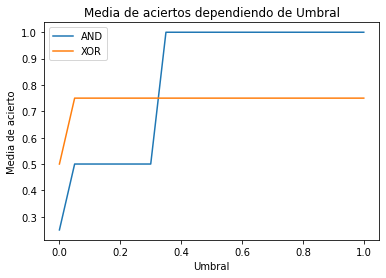

In [129]:
listadoUmbral = np.linspace(0,1,21)
listadoCoef =  np.linspace(0,1,21)
listadoIteraciones = np.linspace(0,100,51)
listamediasAND = []
listamediasXOR = []
for ubmral in listadoUmbral:
    errorAND = 0
    errorXOR = 0
    neurona_clasificar_and = entrenamiento_and(entradas,neurona_and,ubmral,learning_rate)
    neurona_clasificar_xor = entrenamiento_xor(entradas,neurona_xor,ubmral,learning_rate)
    for entrada in entradas:
        expectedAND = entrada[0] * entrada[1]
        obtenidoAND = funcionActivacion(neurona_clasificar_and,entrada,ubmral)
        expectedXOR = entrada[0] ^ entrada[1]
        obtenidoXOR = funcionActivacion(neurona_clasificar_xor,entrada,ubmral)
        funcionActivacion(neurona_clasificar_xor,entrada,umbral)
        if obtenidoAND == expectedAND:
            errorAND += 1
        if obtenidoXOR == expectedAND:
            errorXOR += 1
    listamediasAND.append(errorAND/4)
    listamediasXOR.append(errorXOR/4)
plt.plot(listadoUmbral,listamediasAND)
plt.ylabel('Media de acierto')
plt.xlabel('Umbral')
plt.plot(listadoUmbral,listamediasXOR)
plt.ylabel('Media de acierto')
plt.xlabel('Umbral')
plt.title('Media de aciertos dependiendo de Umbral')
plt.legend(['AND', 'XOR'])